<a href="https://colab.research.google.com/github/akhil0sharma/EDA_ON_SQL/blob/main/us_accidents_EDA_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [ ]:
df1 = pd.read_csv("US_Accidents_Dec21_updated.csv")
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22921 entries, 0 to 22920
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     22921 non-null  object 
 1   Severity               22921 non-null  int64  
 2   Start_Time             22921 non-null  object 
 3   End_Time               22921 non-null  object 
 4   Start_Lat              22920 non-null  float64
 5   Start_Lng              22920 non-null  float64
 6   End_Lat                22920 non-null  float64
 7   End_Lng                22920 non-null  float64
 8   Distance(mi)           22920 non-null  float64
 9   Description            22920 non-null  object 
 10  Number                 3215 non-null   float64
 11  Street                 22920 non-null  object 
 12  Side                   22920 non-null  object 
 13  City                   22920 non-null  object 
 14  County                 22920 non-null  object 
 15  St

In [ ]:
df1.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,22921.000000,22920.000000,22920.000000,22920.000000,22920.000000,22920.000000,3215.000000,22275.000000,3961.000000,22255.000000,22307.000000,22241.000000,19320.000000,1920.000000
mean,2.321234,35.803312,-106.313440,35.803478,-106.313383,0.684327,8425.976983,59.150519,22.595228,63.308605,29.999129,9.271692,9.506693,0.027760
std,0.585371,4.157034,12.863701,4.157162,12.863910,1.737037,10120.026381,18.167628,18.119386,21.415269,0.261188,3.043264,9.571508,0.080064
min,2.000000,26.218240,-123.526160,26.209870,-123.526160,0.000000,1.000000,-18.000000,-34.700000,4.000000,20.670000,0.000000,0.000000,0.000000
25%,2.000000,32.880480,-118.287120,32.883650,-118.286965,0.188000,1700.500000,51.800000,10.600000,48.000000,29.890000,10.000000,5.800000,0.000000
50%,2.000000,34.139250,-98.501670,34.139920,-98.501879,0.417000,4882.000000,62.600000,24.200000,64.000000,29.990000,10.000000,8.100000,0.000000
75%,3.000000,38.606267,-95.333918,38.605600,-95.334934,0.675250,11202.500000,70.000000,34.000000,80.000000,30.110000,10.000000,11.500000,0.020000
max,4.000000,48.125360,-80.005270,48.122370,-79.958150,150.138000,88699.000000,127.400000,101.000000,100.000000,30.920000,70.000000,822.800000,1.120000


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df1 = df1.select_dtypes(include=numerics)
numeric_df1.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,40.108910,-83.092860,40.112060,-83.031870,3.230,NaN,42.1,36.1,58.0,29.76,10.0,10.4,0.00
1,2,39.865420,-84.062800,39.865010,-84.048730,0.747,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
2,2,39.102660,-84.524680,39.102090,-84.523960,0.055,NaN,36.0,NaN,97.0,29.70,10.0,NaN,0.02
3,2,41.062130,-81.537840,41.062170,-81.535470,0.123,NaN,39.0,NaN,55.0,29.65,10.0,NaN,NaN
4,3,39.172393,-84.492792,39.170476,-84.501798,0.500,NaN,37.0,29.8,93.0,29.69,10.0,10.4,0.01


In [ ]:
#missing values
missing_perc=df1.isna().sum().sort_values(ascending=False)/len(df1)
missing_perc

Precipitation(in)        0.916234
Number                   0.859736
Wind_Chill(F)            0.827189
Wind_Speed(mph)          0.157105
Visibility(mi)           0.029667
Humidity(%)              0.029056
Weather_Condition        0.028489
Temperature(F)           0.028184
Pressure(in)             0.026788
Wind_Direction           0.011300
Weather_Timestamp        0.011125
Airport_Code             0.000349
Timezone                 0.000305
Zipcode                  0.000305
Nautical_Twilight        0.000044
Civil_Twilight           0.000044
Sunrise_Sunset           0.000044
Bump                     0.000044
Turning_Loop             0.000044
Traffic_Calming          0.000044
Stop                     0.000044
Crossing                 0.000044
Amenity                  0.000044
Junction                 0.000044
No_Exit                  0.000044
Railway                  0.000044
Roundabout               0.000044
Traffic_Signal           0.000044
Station                  0.000044
Give_Way      

In [ ]:
#removing zeroes perc
missing_perc[missing_perc != 0]

Precipitation(in)        0.916234
Number                   0.859736
Wind_Chill(F)            0.827189
Wind_Speed(mph)          0.157105
Visibility(mi)           0.029667
Humidity(%)              0.029056
Weather_Condition        0.028489
Temperature(F)           0.028184
Pressure(in)             0.026788
Wind_Direction           0.011300
Weather_Timestamp        0.011125
Airport_Code             0.000349
Timezone                 0.000305
Zipcode                  0.000305
Nautical_Twilight        0.000044
Civil_Twilight           0.000044
Sunrise_Sunset           0.000044
Bump                     0.000044
Turning_Loop             0.000044
Traffic_Calming          0.000044
Stop                     0.000044
Crossing                 0.000044
Amenity                  0.000044
Junction                 0.000044
No_Exit                  0.000044
Railway                  0.000044
Roundabout               0.000044
Traffic_Signal           0.000044
Station                  0.000044
Give_Way      

<AxesSubplot:>

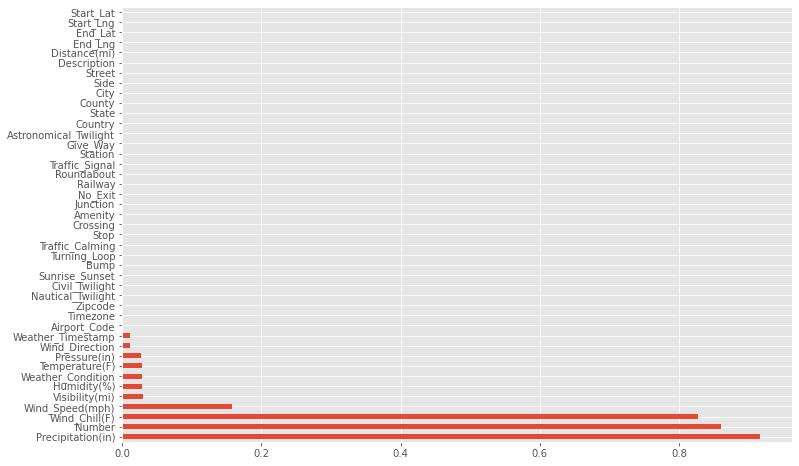

In [ ]:
missing_perc[missing_perc != 0].plot(kind = 'barh')

# Exploratory Analysis and Visualization

Columns we'll analyze:

City
Start Time
Start Lat, Start Lng
Temperature
Weather Condition

In [ ]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df1.City.unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Missouri City', 'Alvin',
       nan], dtype=object)

Ask & answer questions: 
Are there more accidents in warmer or colder areas?
Which 5 states have the highest number of accidents? 
Among the top 100 cities in number of accidents, which states do they belong to most frequently.
What time of the day are accidents most frequent in? 
Which days of the week have the most accidents?
Which months have the most accidents?
What is the trend of accidents year over year (decreasing/increasing?)


In [ ]:
cities_by_accident = df1.City.value_counts()
cities_by_accident

Houston         1774
Dallas          1627
Los Angeles     1077
Minneapolis      669
Kansas City      638
                ... 
Zelienople         1
Holts Summit       1
Frankford          1
Phillipsburg       1
Portsmouth         1
Name: City, Length: 1530, dtype: int64

In [ ]:
cities_by_accident[:15]

Houston          1774
Dallas           1627
Los Angeles      1077
Minneapolis       669
Kansas City       638
Saint Paul        485
Fort Worth        420
San Diego         406
Sacramento        398
San Jose          367
Austin            271
Oklahoma City     226
San Antonio       201
Oakland           191
Saint Louis       174
Name: City, dtype: int64

<AxesSubplot:>

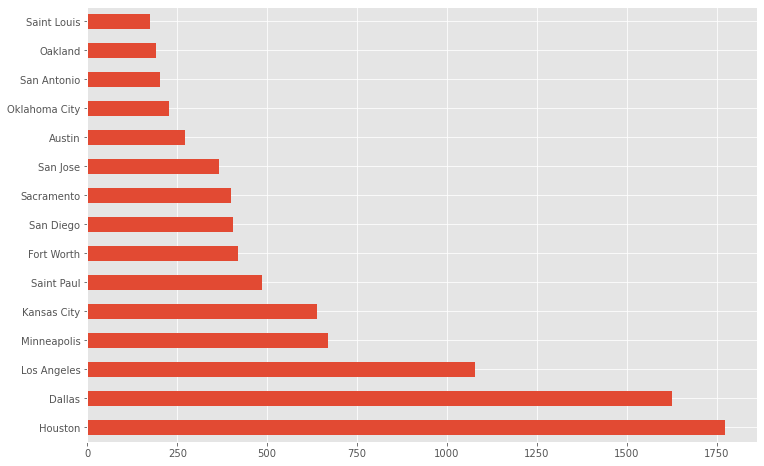

In [ ]:
cities_by_accident[:15].plot(kind='barh')

In [ ]:
sns.set_style("darkgrid")
sns.histplot()

In [ ]:
high_accident_cities=cities_by_accident[cities_by_accident>=100]
low_accident_cities=cities_by_accident[cities_by_accident<100]

In [ ]:
len(high_accident_cities)

30

In [ ]:
len(low_accident_cities)

1500

In [ ]:
len(high_accident_cities)/len(cities_by_accident)

0.0196078431372549

<AxesSubplot:xlabel='City', ylabel='Count'>

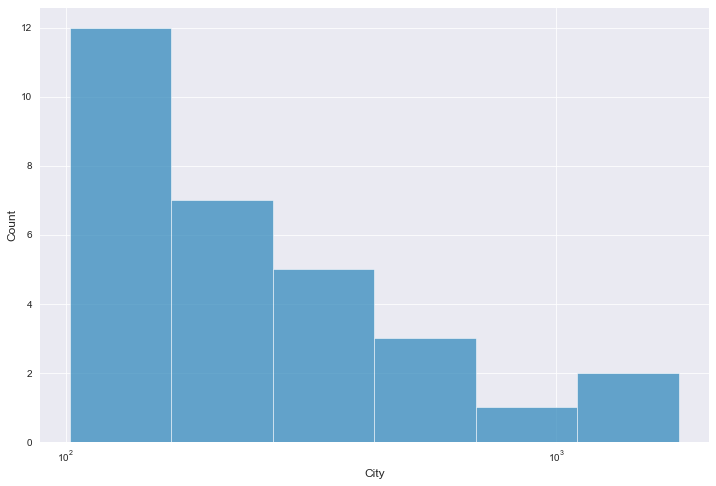

In [ ]:
sns.histplot(high_accident_cities,log_scale=True)

<AxesSubplot:xlabel='City', ylabel='Count'>

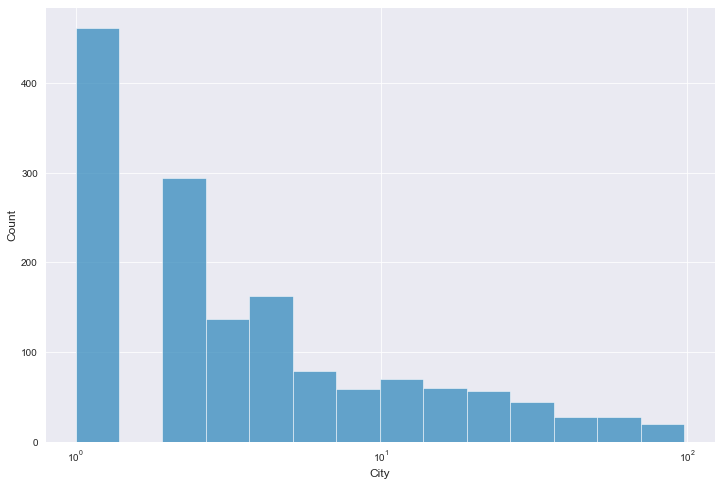

In [ ]:
sns.histplot(low_accident_cities,log_scale=True)

In [ ]:
cities_by_accident[cities_by_accident == 1]##cities with only one accident

Lester Prairie    1
Carencro          1
La Vista          1
Malcom            1
Fulshear          1
                 ..
Zelienople        1
Holts Summit      1
Frankford         1
Phillipsburg      1
Portsmouth        1
Name: City, Length: 462, dtype: int64

In [ ]:
len(cities_by_accident[cities_by_accident == 1])

462

In [ ]:
##total 462 cities are there with only one accident

In [ ]:
df1.Start_Time

0        2016-02-08 00:37:08
1        2016-02-08 05:56:20
2        2016-02-08 06:15:39
3        2016-02-08 06:51:45
4        2016-02-08 07:53:43
                ...         
22916    2016-10-06 23:51:28
22917    2016-10-07 01:11:32
22918    2016-10-07 01:12:53
22919    2016-10-07 02:59:07
22920    2016-10-07 03:08:37
Name: Start_Time, Length: 22921, dtype: object

In [ ]:
df1.Start_Time=pd.to_datetime(df1.Start_Time)

In [ ]:
df1.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

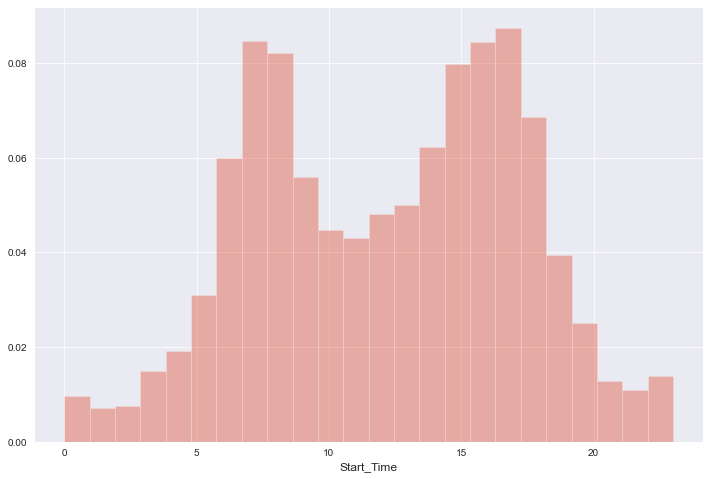

In [ ]:
sns.distplot(df1.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)
Next higest percentage is 3 pm to 6 pm.

<AxesSubplot:xlabel='Start_Time'>

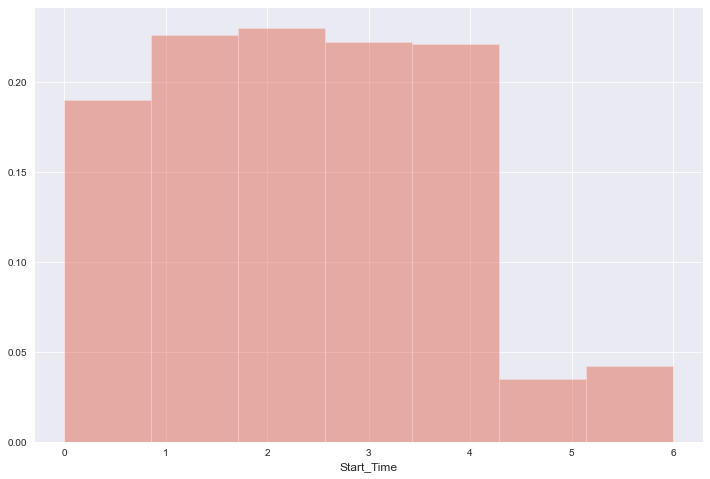

In [ ]:
sns.distplot(df1.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

accidentes are lower on weekends and higher on week days

<AxesSubplot:xlabel='Start_Time'>

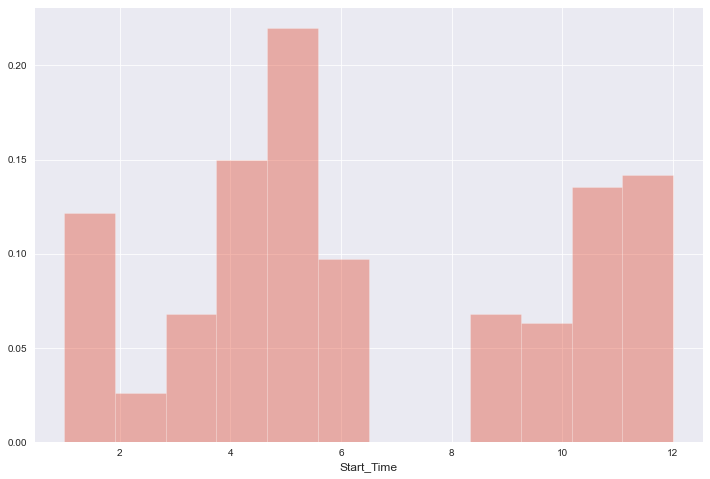

In [ ]:
sns.distplot(df1.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

-no accidents during july and august and maximum accidents occur during may
-according to graph we can say the majority of accidents occur during winters(nov,dec,jan)

Start Latitude & Longitude

In [ ]:
df1.Start_Lat

0        40.108910
1        39.865420
2        39.102660
3        41.062130
4        39.172393
           ...    
22916    32.852590
22917    29.665780
22918    41.695450
22919    30.293073
22920          NaN
Name: Start_Lat, Length: 22921, dtype: float64

In [ ]:
df1.Start_Lng

0       -83.092860
1       -84.062800
2       -84.524680
3       -81.537840
4       -84.492792
           ...    
22916   -96.883690
22917   -95.259957
22918   -92.789130
22919   -95.464451
22920          NaN
Name: Start_Lng, Length: 22921, dtype: float64

In [ ]:
sample_df1=df1.sample(int(0.1 * len(df1)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

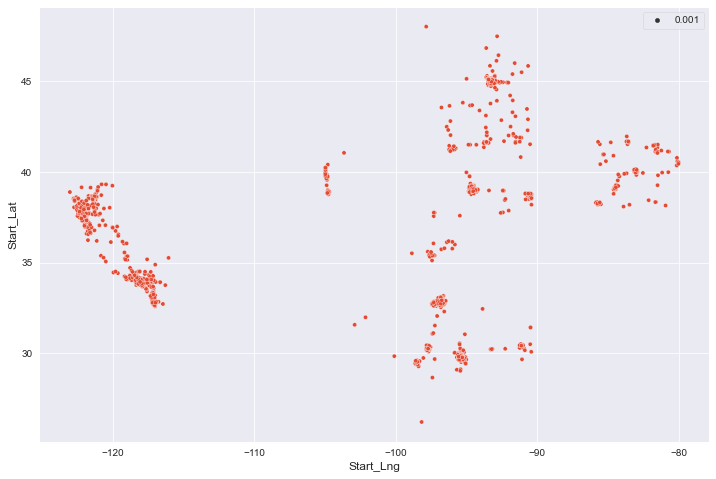

In [ ]:
sns.scatterplot(x=sample_df1.Start_Lng, y=sample_df1.Start_Lat, size=0.001)

In [ ]:
df1.State.value_counts()

CA    10792
TX     5828
MN     1739
MO     1269
OH      624
KS      503
CO      471
IA      416
OK      347
LA      280
NE      152
IN      124
KY      108
WI       76
PA       66
WV       52
MS       19
MI       14
WY       12
NM        8
AR        6
NV        4
SD        4
MT        3
IL        2
ND        1
Name: State, dtype: int64

In [ ]:
df1.State()

california,texas,minnesota,missouri and ohio has the maximum accidents